![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carguen la base de datos preparada desde la fase 2.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('revision.csv')
df.head(3)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,ANTIBIOTICO USADO_CEFALOSPORINA_AMINOGLUCOCIDO,...,BIOPSIA_ADENOCARCINOMA GLEASON 10,BIOPSIA_ADENOCARCINOMA GLEASON 6,BIOPSIA_ADENOCARCINOMA GLEASON 7,BIOPSIA_ADENOCARCINOMA GLEASON 8,BIOPSIA_ADENOCARCINOMA GLEASON 9,BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS,BIOPSIA_HIPERPLASIA PROSTATICA,BIOPSIA_NEG,BIOPSIA_PROSTATITIS,HOSPITALIZACION
0,53.0,0,0,4.0,0,1,12.0,0,0,False,...,False,False,False,False,False,False,False,True,False,1
1,56.0,0,0,7.7,0,1,12.0,0,0,False,...,False,False,False,False,False,False,False,True,False,1
2,57.0,0,0,29.0,1,1,24.0,0,0,False,...,False,False,False,False,False,False,False,True,False,1


Separen el dataset en X, y (variable objetivo)

In [2]:
# Seleccionamos las variables predictoras X y la variable a predecir y

X = df.drop(['HOSPITALIZACION'],axis=1)
y = df['HOSPITALIZACION']
X = X.values

Separen el dataset en X_train, X_test, y_train y y_test

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [4]:
print('Proporción de etiquetas en set de entrenamiento:', y_train.sum()/y_train.count())
print('Proporción de etiquetas en set de testeo:', y_test.sum()/y_test.count())

Proporción de etiquetas en set de entrenamiento: 0.4797687861271676
Proporción de etiquetas en set de testeo: 0.5806451612903226


Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

#Instanciamos el modelo
tree_model = DecisionTreeClassifier(max_depth = 17)

#Entrenamos el modelo con la particion de train
tree_model.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=17)

In [6]:
# Predecimos sobre nuestro set de entrenamiento
y_train_pred = tree_model.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = tree_model.predict(X_test)

# Comparamos con las etiquetas reales

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))


Accuracy sobre conjunto de Train: 0.9976878612716763
Accuracy sobre conjunto de Test: 0.9861751152073732


Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

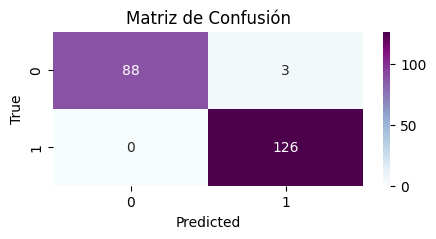

In [7]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5,2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='BuPu')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matriz de Confusión")
plt.show()

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

In [8]:
# Comparamos con las etiquetas reales

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.9976878612716763
Accuracy sobre conjunto de Test: 0.9861751152073732


Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

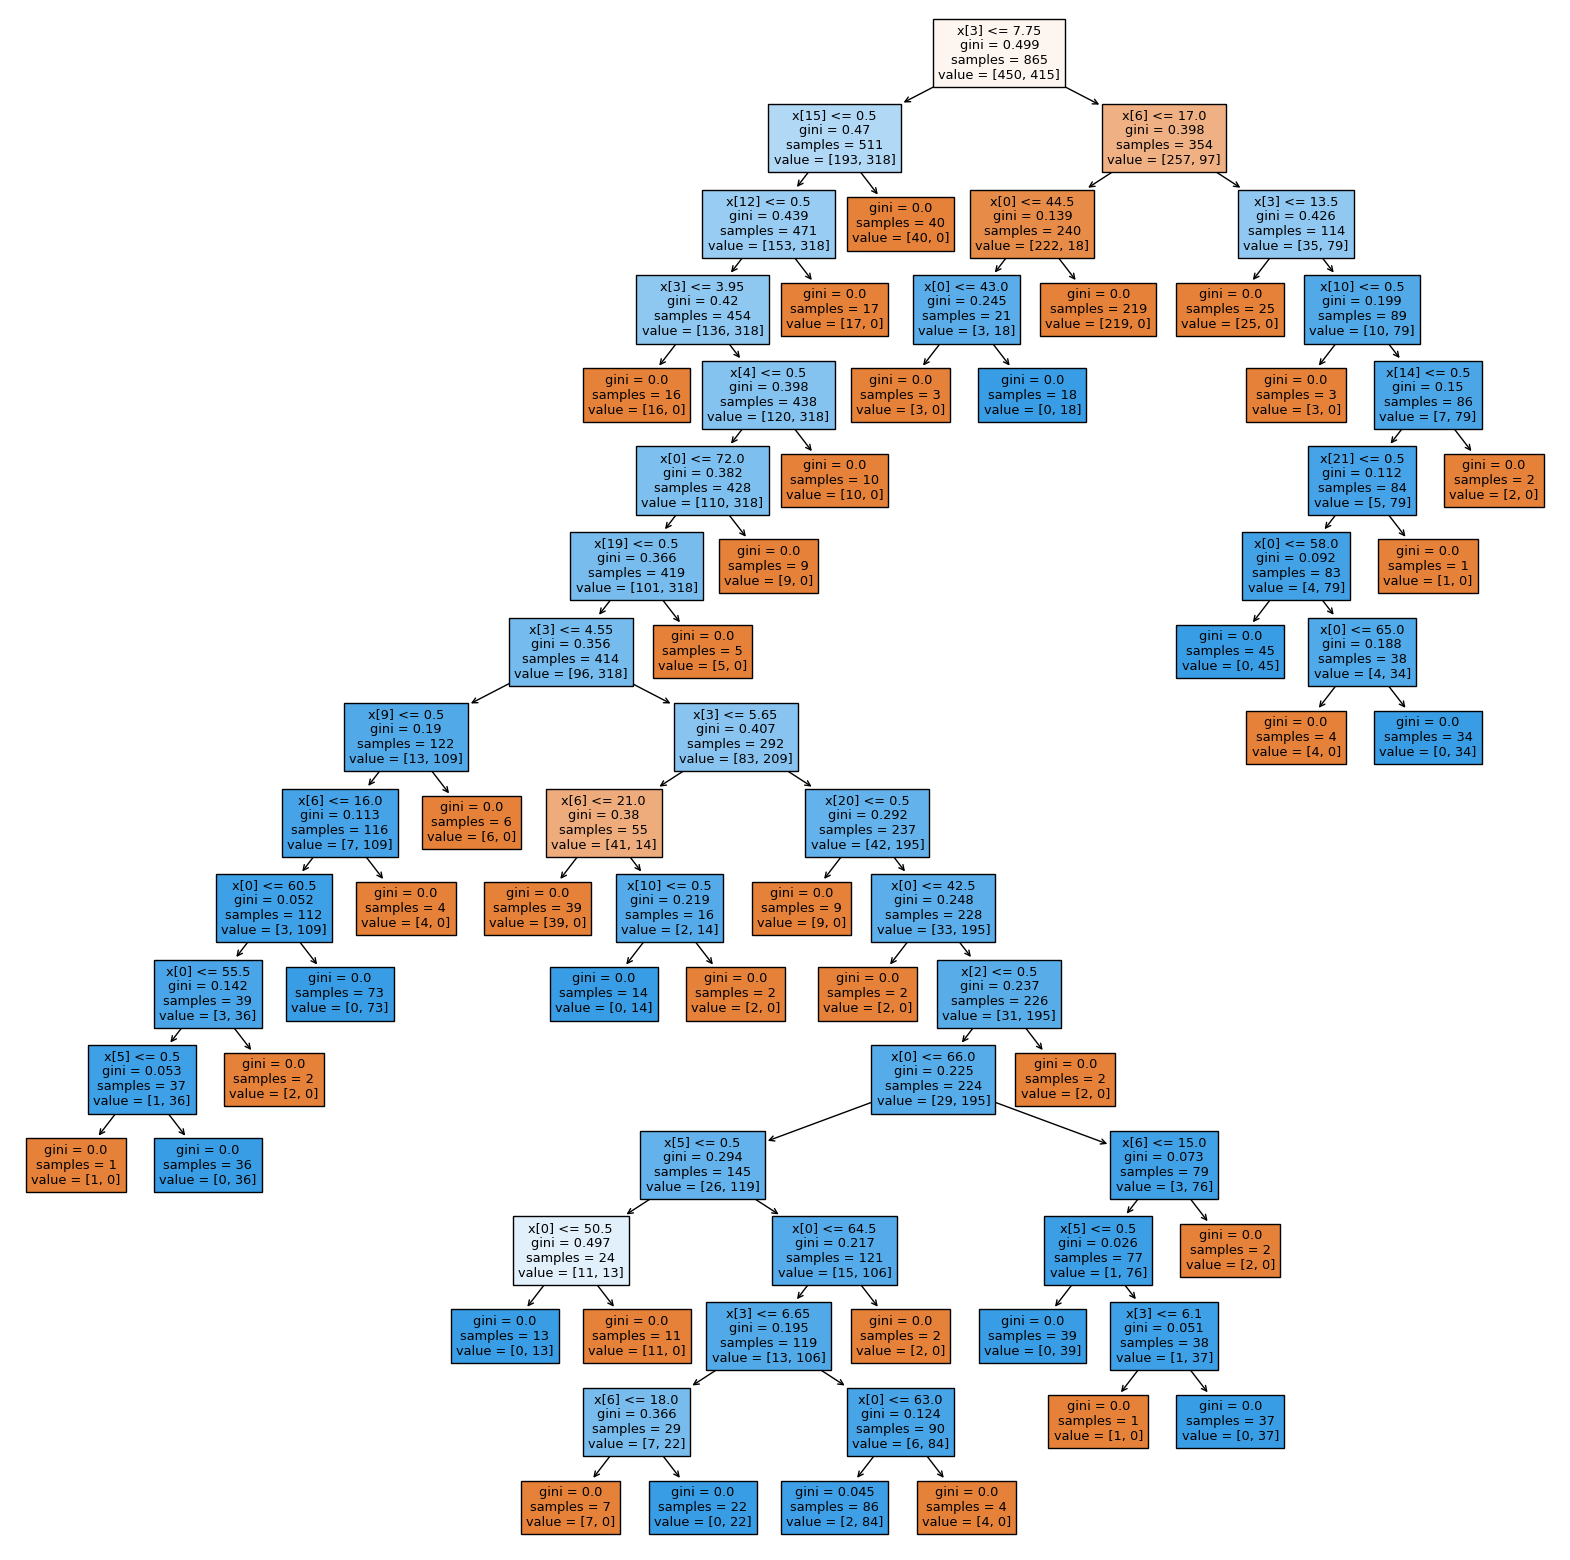

In [9]:
from sklearn import tree

plt.figure(figsize = (20,20))
tree.plot_tree(tree_model, filled = True)
plt.show()

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

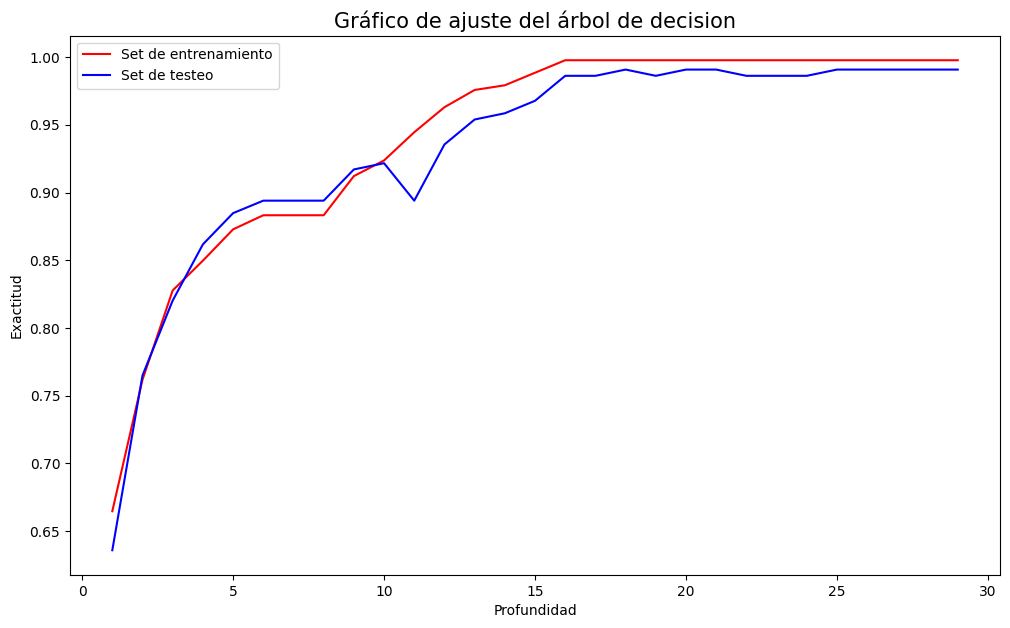

([0.6647398843930635,
  0.761849710982659,
  0.8277456647398844,
  0.8497109826589595,
  0.8728323699421965,
  0.8832369942196532,
  0.8832369942196532,
  0.8832369942196532,
  0.9121387283236995,
  0.923699421965318,
  0.9445086705202312,
  0.9630057803468208,
  0.9757225433526011,
  0.9791907514450867,
  0.9884393063583815,
  0.9976878612716763,
  0.9976878612716763,
  0.9976878612716763,
  0.9976878612716763,
  0.9976878612716763,
  0.9976878612716763,
  0.9976878612716763,
  0.9976878612716763,
  0.9976878612716763,
  0.9976878612716763,
  0.9976878612716763,
  0.9976878612716763,
  0.9976878612716763,
  0.9976878612716763],
 [0.6359447004608295,
  0.7649769585253456,
  0.8202764976958525,
  0.8617511520737328,
  0.8847926267281107,
  0.8940092165898618,
  0.8940092165898618,
  0.8940092165898618,
  0.9170506912442397,
  0.9216589861751152,
  0.8940092165898618,
  0.9354838709677419,
  0.9539170506912442,
  0.9585253456221198,
  0.967741935483871,
  0.9861751152073732,
  0.98617511

In [49]:
train_prec =  []
test_prec = []
max_deep_list = list(range(1, 30))

for deep in max_deep_list:
    clf_3 = DecisionTreeClassifier(max_depth=deep, criterion='entropy')
    clf_3.fit(X_train, y_train)
    train_prec.append(clf_3.score(X_train, y_train))
    test_prec.append(clf_3.score(X_test, y_test))

plt.figure(figsize=(12,7))
plt.plot(max_deep_list, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_deep_list, test_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste del árbol de decision', fontsize = 15)
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('Profundidad')
plt.show()

Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

In [10]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn

KNeighborsClassifier(n_neighbors=10)

Encuentre el valor óptimo para k

In [12]:
# Predecimos sobre nuestro set de entrenamiento
y_train_pred = knn.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = knn.predict(X_test)

# Comparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.9248554913294798
Accuracy sobre conjunto de Test: 0.9216589861751152


Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

In [14]:
# Importamos cross_val_score

from sklearn.model_selection import cross_val_score

tree_model = DecisionTreeClassifier()
tree_scores = cross_val_score(tree_model, X, y, cv=5)

knn = KNeighborsClassifier(n_neighbors=1)
knn_scores = cross_val_score(knn, X, y, cv=5)

print(tree_scores)
print(knn_scores)

[0.98617512 1.         0.97685185 1.         1.        ]
[0.97235023 1.         0.98611111 1.         1.        ]


In [15]:
print("Accuracy para Tree: %0.2f (+/- %0.2f)" % (tree_scores.mean(), tree_scores.std() * 2))
print("Accuracy para KNN: %0.2f (+/- %0.2f)" % (knn_scores.mean(), knn_scores.std() * 2))

Accuracy para Tree: 0.99 (+/- 0.02)
Accuracy para KNN: 0.99 (+/- 0.02)


In [19]:
from sklearn.model_selection import cross_validate
tree_scores = cross_validate(tree_model, X, y, cv=5, scoring = ['precision','recall'])
knn_scores = cross_validate(knn, X, y, cv=5, scoring = ['precision','recall'])

In [20]:
print(tree_scores)
print(knn_scores)


{'fit_time': array([0.00399852, 0.00298572, 0.00298142, 0.00300241, 0.00299287]), 'score_time': array([0.00601649, 0.00401926, 0.00401139, 0.00400472, 0.00498867]), 'test_precision': array([0.97321429, 1.        , 0.96428571, 1.        , 1.        ]), 'test_recall': array([1., 1., 1., 1., 1.])}
{'fit_time': array([0.00199628, 0.00197935, 0.00099945, 0.00399923, 0.00300455]), 'score_time': array([0.02401924, 0.02000332, 0.01599836, 0.024997  , 0.01499987]), 'test_precision': array([0.98130841, 1.        , 0.97297297, 1.        , 1.        ]), 'test_recall': array([0.96330275, 1.        , 1.        , 1.        , 1.        ])}


In [22]:
param_g = {'n_neighbors':np.arange(1, 20),
              'weights': ['uniform', 'distance'],
              'leaf_size':[1,3,5,7,10],
              'algorithm':['auto', 'kd_tree']}

In [23]:
knn = KNeighborsClassifier()

In [25]:
from sklearn.model_selection import GridSearchCV

# Le pasamos la grilla que creamos
model = GridSearchCV(knn, param_grid=param_g, cv=5)

# Entrenamos
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5, 7, 10],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']})

In [26]:
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores hiperparámetros: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'weights': 'uniform'}
Mejor Score: 0.9803468208092486



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002200,0.000981,0.016200,0.003601,auto,1,1,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.976879,0.982659,0.976879,0.988439,0.976879,0.980347,0.004624,1
1,0.001401,0.000491,0.003599,0.000489,auto,1,1,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.976879,0.982659,0.976879,0.988439,0.976879,0.980347,0.004624,1
2,0.001400,0.000490,0.014000,0.004049,auto,1,2,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.976879,0.982659,0.953757,0.976879,0.965318,0.971098,0.010340,21
3,0.001199,0.000400,0.004200,0.000751,auto,1,2,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.976879,0.982659,0.953757,0.976879,0.965318,0.971098,0.010340,21
4,0.001799,0.000749,0.012002,0.001095,auto,1,3,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.942197,0.971098,0.942197,0.971098,0.924855,0.950289,0.018132,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.004400,0.000493,0.003002,0.000001,kd_tree,10,17,distance,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.872832,0.919075,0.924855,0.930636,0.913295,0.912139,0.020486,221
376,0.004471,0.000590,0.009799,0.000747,kd_tree,10,18,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.786127,0.849711,0.832370,0.855491,0.855491,0.835838,0.026261,361
377,0.004398,0.000485,0.003604,0.000493,kd_tree,10,18,distance,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.872832,0.907514,0.919075,0.930636,0.913295,0.908671,0.019482,254
378,0.004796,0.001167,0.011599,0.000802,kd_tree,10,19,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.797688,0.820809,0.815029,0.838150,0.843931,0.823121,0.016593,371


In [27]:
#Predecimos en los datos de test con el mejor modelo obtenido
prediction = model.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[ 90   1]
 [  0 126]]


In [29]:
print('Exactitud:', accuracy_score(y_test, prediction))

Exactitud: 0.9953917050691244


In [30]:
from sklearn.metrics import classification_report

report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        91
           1       0.99      1.00      1.00       126

    accuracy                           1.00       217
   macro avg       1.00      0.99      1.00       217
weighted avg       1.00      1.00      1.00       217



De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 